In [25]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

# Load the saved Julia map, and check the painted ring using Gnomview

/var/folders/pk/xl4598515pb7q2jfw1tdzyr00000gn/T/ipykernel_13700/564680675.py:2: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  m = hp.read_map("disc_mask_from_julia.fits", verbose=False)


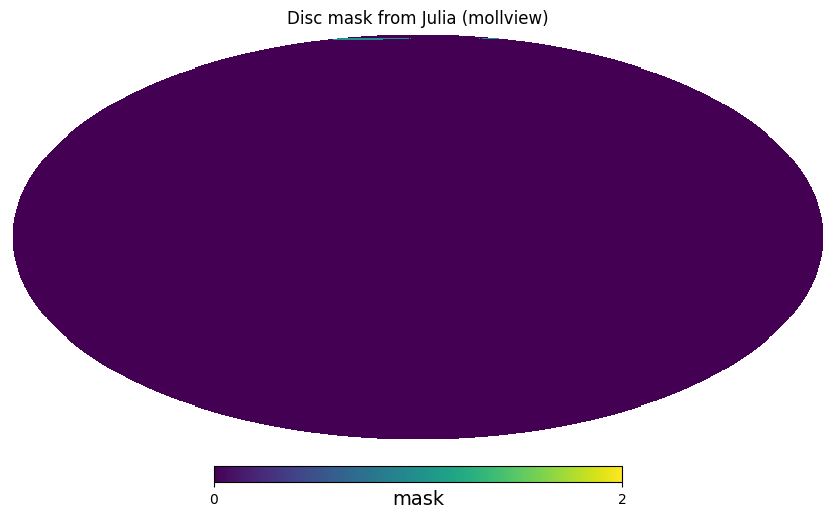

In [26]:
# Read the map
m = hp.read_map("disc_mask_from_julia.fits", verbose=False)

# Mollweide view
hp.mollview(m, title="Disc mask from Julia (mollview)", unit="mask", min=0, max=2)
plt.show()

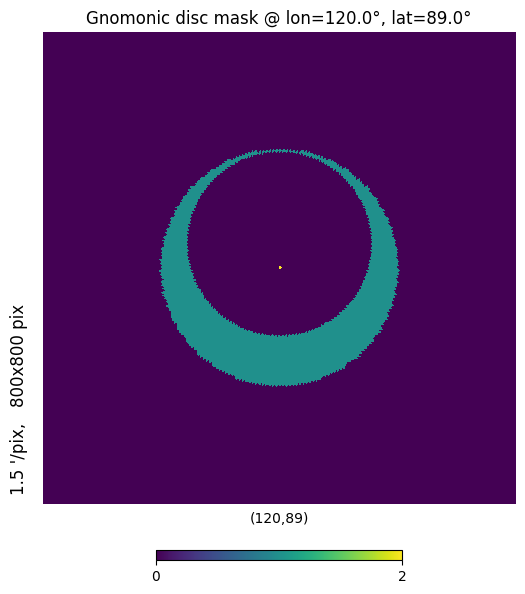

In [27]:
# Gnomonic view centered at your desired point
theta0 = np.deg2rad(1.0)   # colatitude in radians
phi0   = np.deg2rad(120)  # longitude in radians
theta_max = np.deg2rad(5.0)  # radius of the disc in radians
lon = np.degrees(phi0)
lat = 90.0 - np.degrees(theta0)  # convert colat -> latitude

hp.gnomview(
    m,
    rot=(lon, lat, 0.0),   # (lon, lat, psi) in degrees
    xsize=800,
    reso=1.5,              # arcmin per pixel
    min=0, max=2,
    title=f"Gnomonic disc mask @ lon={lon:.1f}°, lat={lat:.1f}°"
)
plt.show()


## This annular structure is not expected
# Instead, if using hp.query_disc in healpy, it is ok

/var/folders/pk/xl4598515pb7q2jfw1tdzyr00000gn/T/ipykernel_13700/2715965805.py:9: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  m = hp.read_map("disc_mask_from_julia.fits", verbose=False)


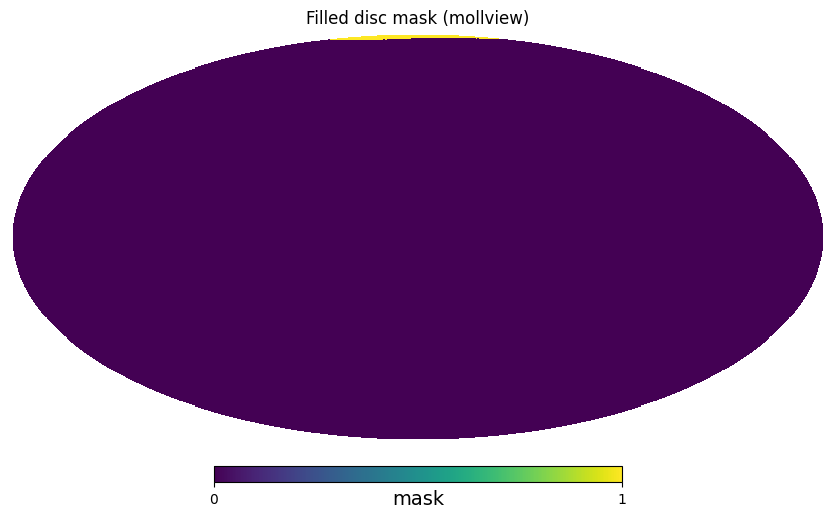

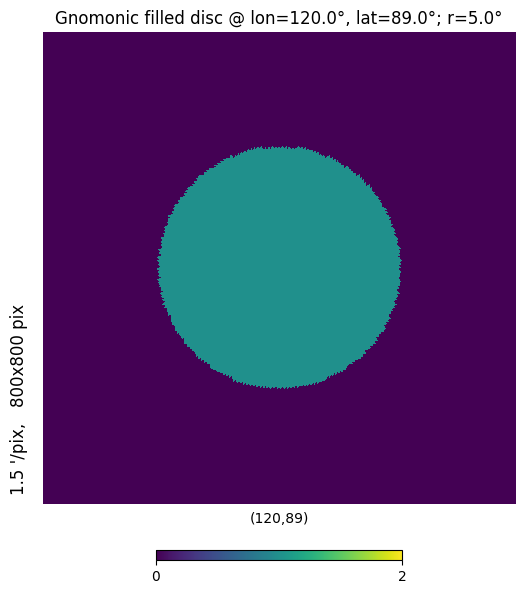

In [28]:
# --- Center (match your earlier center) ---
lon_deg = np.degrees(phi0)
lat_deg = 90.0 - np.degrees(theta0)

# --- Disc radius (degrees) ---
r_deg = np.rad2deg(theta_max)   # change as needed

# --- Load any HEALPix map to get nside (or set nside directly) ---
m = hp.read_map("disc_mask_from_julia.fits", verbose=False)
nside = hp.get_nside(m)

# --- Build the filled disc with query_disc ---
# healpy expects (theta, phi) = (colatitude, longitude)
theta_c = np.deg2rad(90.0 - lat_deg)
phi_c   = np.deg2rad(lon_deg)
vec     = hp.ang2vec(theta_c, phi_c)

radius = np.deg2rad(r_deg)
disc_pix = hp.query_disc(
    nside,
    vec,
    radius,
    inclusive=True,  # include boundary-touching pixels
    fact=4,          # increase for a more accurate boundary
    nest=False       # set True if your map is NESTED
)

# Create a mask array: 1 inside disc, 0 outside
disc_mask = np.zeros(hp.nside2npix(nside), dtype=np.int8)
disc_mask[disc_pix] = 1

# --- Plot: Mollweide and Gnomonic views of the filled disc ---
hp.mollview(disc_mask, title="Filled disc mask (mollview)", unit="mask", min=0, max=1)
plt.show()

hp.gnomview(
    disc_mask,
    rot=(lon_deg, lat_deg, 0.0),
    xsize=800,
    reso=1.5,   # arcmin per pixel (as in your example)
    min=0, max=2,
    title=f"Gnomonic filled disc @ lon={lon_deg:.1f}°, lat={lat_deg:.1f}°; r={r_deg}°"
)
plt.show()